In [4]:
'''
Date: 2022.04.26
Title: 
By: Kang Jin Seong
'''
''' #PCA 클래스 '''

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2022-04-26 08:37:47--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-26 08:37:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-26 08:37:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(50, 10000)


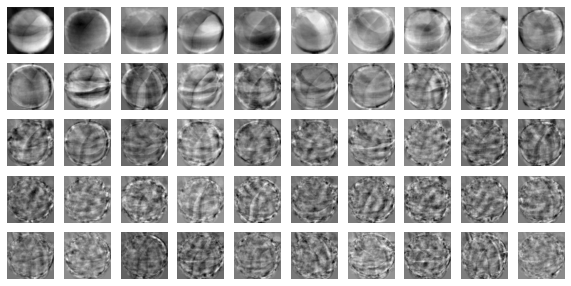

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
print(pca.components_.shape)
#PCA 클래스가 찾은 주성분은 components_속성에 저장되어 있다.
# 첫 번째 차원이 50 = 주성분, 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr)  # n 은 샘플 개수 입니다.
  # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:  # n개 까지만 그립니다.
        axs[i,j].imshow(arr[i*10 + j,], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1,100,100)) # 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸것입니다.

In [11]:
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성개수를 10,000에서 50으로 줄일 수있다.
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


(300, 10000)


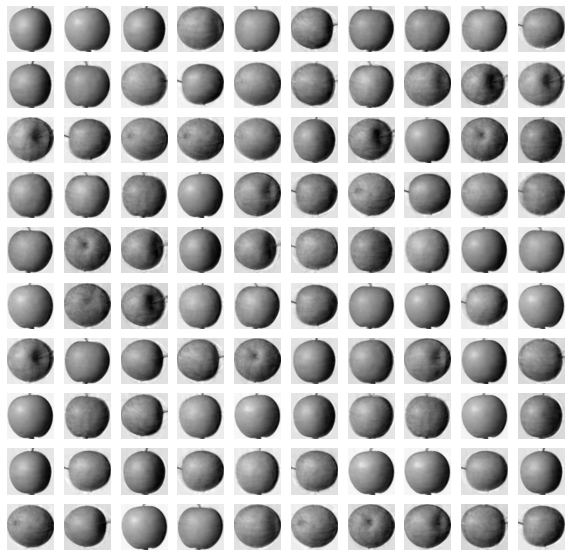

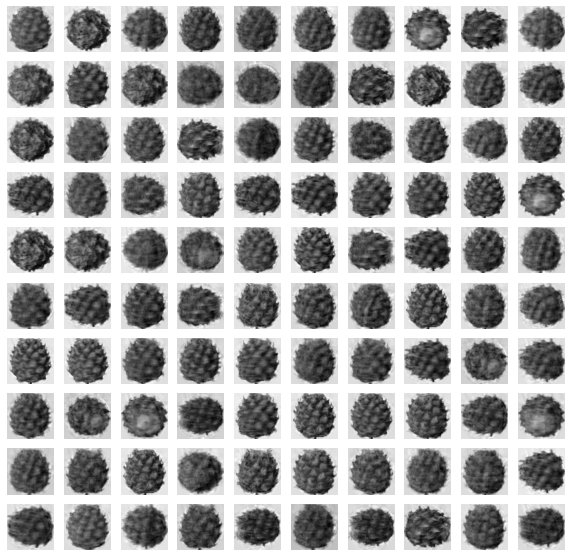

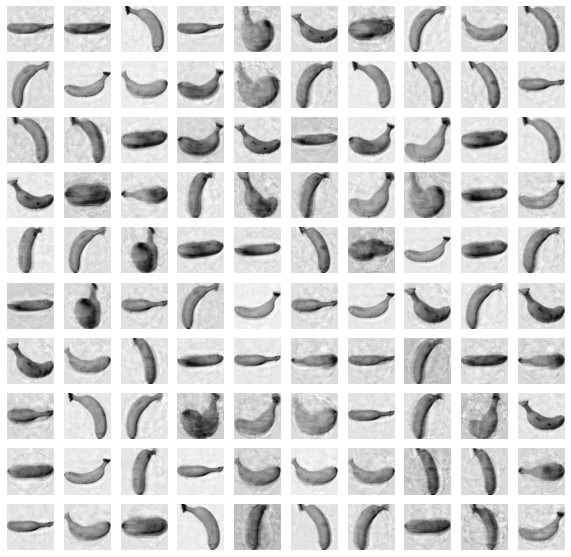

In [12]:
''' # 원본 데이터 재구성 '''
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

0.9215010336496409


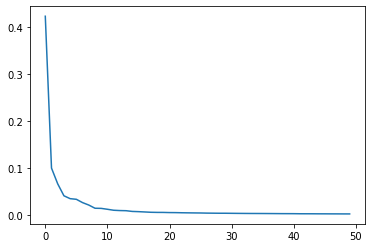

In [14]:
# 설명된 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

In [15]:
#다른 알고리즘과 함께 사용하기(축소한 데이터를 지도 학습에 적용해보고 차이 확인)
#로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 타깃값 생성: 사과 0, 파인애플 1, 바나나 2

target = np.array([0]*100 + [1]*100 + [2]*100)
# 교자 검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
print('\n')

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7230697631835938


1.0
0.042243337631225585


In [16]:
# 원하는 분산의 비율 설정
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

#앞선 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

2
(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.1540668487548828


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
# k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


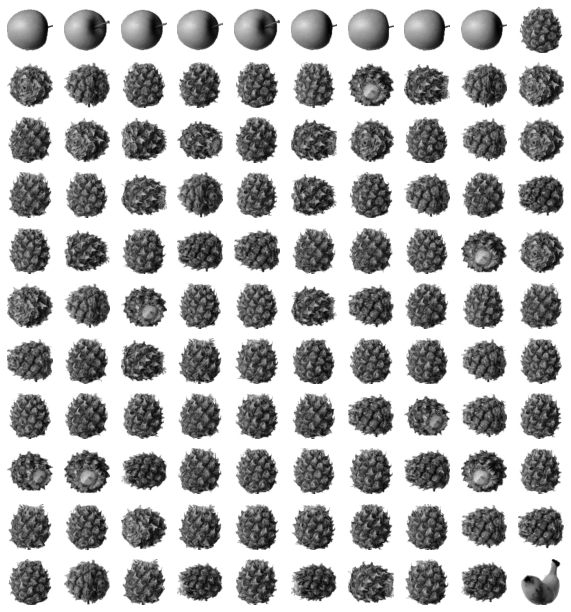

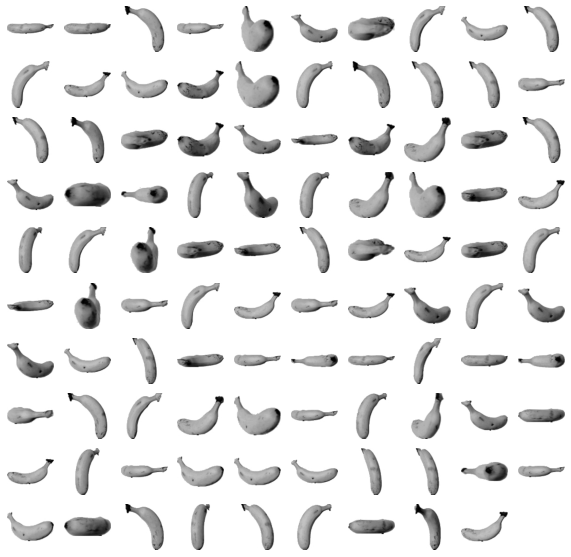

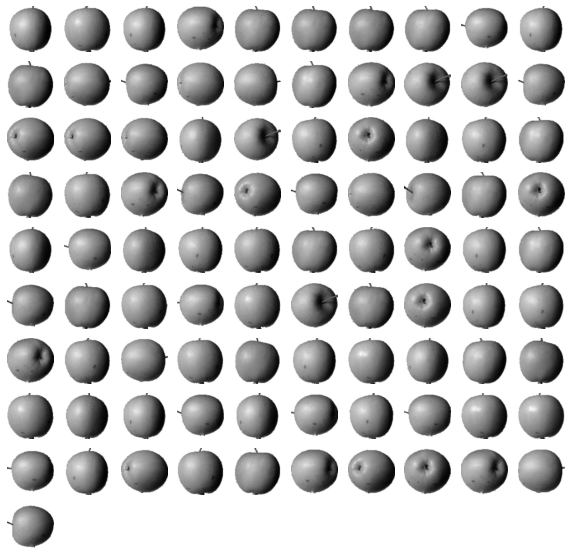

In [18]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

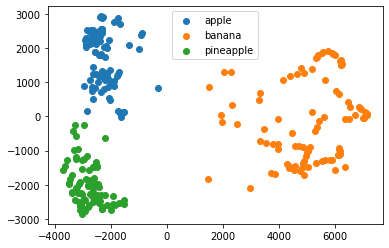

In [19]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()